# Practical 1: Undertanding seismic models and the relationships between wavelets and resolution

In this exercise you will explore how geological features appear in seismic reflection data and how their appearance differs with density, P-wave velocity, wavelet phase and frequency. You will also investigate how seismic reflection images will degrade with depth. 

In this exercise you are simulating a "zero-offset" seismic experiment where sources and receivers are located at the same place just below the Earth's surface so you are only dealing with "normal-incidence" reflections. 

As you move through the exercise there will be questions to think about and discussion with your peers is encouraged. Ultimately, at the end of the exercise you will be asked to determine what type of source should be used in a geotechnical survey for wind-turbine pile installation. 

**Learning objectives**:
1) understand that seismic reflection profiles are produced by the convolution of wavelets reflected from different geological boundaries
2) Understand how reflection coefficients and velocity control the amplitude and depth of reflection in seismic profiles
3) Understand seismic vertical resolution and the limitations of the seismic reflection method

## Code Metadata


| Library | Version | function |
| --- | --- | --- |
| **numpy** | 1.20.3 | facilitates efficient work with arrays |
| [**segyio**](https://segyio.readthedocs.io/en/latest/segyio.html) | 1.9.3 | allows interactions with segy datafiles |
| [**bruges**](https://github.com/agile-geoscience/bruges) | 0.4.4 | prewritten geophysics functions for modelling and processing seismic reflection data |
| [**mayavi**](https://docs.enthought.com/mayavi/mayavi/) | 4.7.4 | 3D scientific data visualization and plotting in python |
| **scipy** | 1.7.2 | provides algorithms for optimization, integration, interpolation, etc.. |
| **scikit-image** | 0.18.3 | collection of algorithms for image processing |
| **matplotlib** | 3.5.0 | comprehensive library for creating static, animated, and interactive visualizations |
| **opencv**| 4.5.2 | Computer Vision library,|

The libraries can be found under the environments.yml and requirements.txt file for efficient setup provided within the repository, see README.md for further setup information

In [4]:
# import required libraries
from skimage.measure import label
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import scipy as sp
import bruges
import seismic.additional_functions as seis # library created for the purpose of this lecture series, explore further if interested!

## 1.1 Read in a geological model

In this section you will read in a .png image which shows 4 geological units, one of them being a "thin-wedge". Geologically speaking, this wedge could be one side of a channel which pinches out to the left. Channels are important in geotechnical assessments as their physical properties may be quite different to the surrounding host rock/sediments. Channels often contain higher-porosity sediments and can be surrounded by mud over-bank deposits which are impermeable. This means channels can be reservoirs for fluids, including gas which could be a hazard in geotechnical works.
This "thin-wedge" model is a classic model in seismic reflection imaging in order to give practitioners an appreciation of seismic resolution (ie the thinnest a geological feature could be such that the top and base are still imaged).

In [93]:
# read in image to numpy array
img = seis.read_img('data/wedge.png', visualise = False) 

# identify each geological section
model_bound = label(img)

# remove imaginary boundary separations seen in img
model = seis.remove_bounds(model_bound, visualise = False) 

# rescale axis to metres
depth = 100
model_scaled = sp.ndimage.zoom(model, 1/(np.shape(model)[0]/depth), order=0)

<class 'numpy.ndarray'>


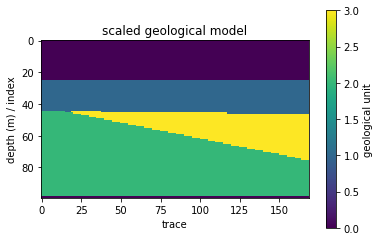

In [94]:
plt.imshow(model_scaled, interpolation='nearest')
plt.title('scaled geological model')
plt.ylabel('depth (m) / index')
plt.xlabel('trace')
plt.colorbar(label='geological unit')
plt.show()

Please note that we are using indices as a proxy to depth! This will lead to a different absolute behaviour relative to the real scenario however it still acts as a great proxy to understanding real seismic behaviour.

We will call our data plotted above $D(z)$, currently our data is the same our idealised Earth model which we will name $E(z)$. 
$$ D(z) = E(z) $$

Throughout this lecture we will slowly build the complexity of this relationship to keep track of how our seismic section is produced mathematically

## 1.2 Density and velocity

P-wave velocity and density both generally increase with depth as sediments/rocks get put under-pressure and pore-spaces and fractures close. There are lithologies which are an exception to this rule- for example, salt has a very low density and high P-wave velocity (4 km/s) despite burial depth. However, for clastic sediments (eroded fragments of rock) that we are likely to find in areas of wind-turbine exploration the density and velocity are expected to increase with depth. However, as noted above, sandy channels could have a lower-velcoity than the surrounding sediments if they are filled with gas.

In the first part of this exercise you are provided with velocities and densities and you will calculate acoustic impedance. We will call this "Wedge model 1".

**QUESTION: What is the unit of acoustic impedance? Does it look familiar to you?**

[Answer]

In [95]:
# define p-wave velocity and density of each section
properties_1 = np.array([[2700, 2750],  # [p-wave velocity, density] for layer 1 (index = 0)
                  [2400, 2450],
                  [2600, 2650], 
                  [3500, 2950]])

assert np.shape(properties_1)[0] == int(np.max(model_scaled))+1, 'number of properties assigned do not match number of layers'

# bring properties into model
earth_1 = properties_1[model_scaled] # array shape = rows, cols, properties

**QUESTION: calculate the impedances for each layer.**

In [96]:
impedances_1 = # Try and use efficient methods instead of for loops!

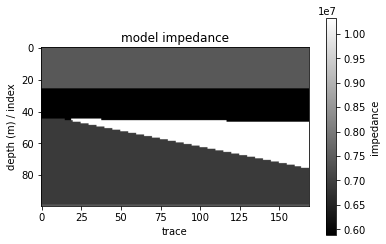

In [97]:
plt.imshow(impedances_1, cmap='gray', aspect=1)
plt.title('model impedance')
plt.ylabel('depth (m) / index')
plt.xlabel('trace')
plt.colorbar(label = 'impedance')
plt.show()

**QUESTION: The Gardner relationship is an empirical relationships that predicts density from velocity based on experimental data. The relationship is:** $ \rho = 0.31 V_p ^ {0.25} $ 
**Using velocities of 2700 m/s, 2600 m/s, 2400 m/s and 2500 m/s for layers 1,2,3 and 4 respectively calculate acoustic impedance using the Gardner relationship. We will call this "Wedge model 2"**

In [98]:
.....

impedances_2 = ....

In [ ]:
#visualise
plt.imshow(impedances_2, cmap='gray', aspect=1)
plt.title('model impedance')
plt.ylabel('depth (m) / index')
plt.xlabel('trace')
plt.colorbar(label = 'impedance')
plt.show()

## 1.3 Reflection coefficients

For "zero-offset" surveys where sources and receivers are located at the same place we only need to worry about "normal incidence reflections". Therefore, we can use the equation: $$ \text{ Reflection coefficient } = \frac{\rho_2 V_2 - \rho_1 V_1 }{\rho_2 V_2 + \rho_1 V_1} $$

**QUESTION: Can we use the above equation for experiments which involve an offset between sources and receivers? If not, why not? What must we do instead?**

[Answer] 

**QUESTION: Calculate reflection coefficients for Wedge model 1 and Wedge model 2. output should be a 2D array containing the reflection coefficients. Tip for efficiency, recall how to use array slicing!**

In [100]:
reflection_coeff_1 = 

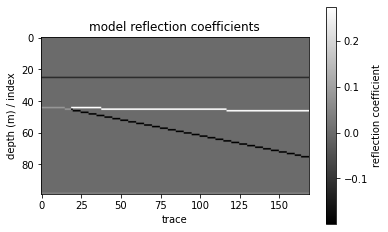

In [101]:
plt.imshow(reflection_coeff_1 ,  cmap='gray', aspect=1)
plt.title('model reflection coefficients')
plt.ylabel('depth (m) / index')
plt.xlabel('trace')
plt.colorbar(label = 'reflection coefficient')
plt.show()

Note that we have derived a variety of physical relationships. We will visualise a vertical profile through the models of acoustic impedance and reflection coefficients to compare them for each wedge model. Try and understand how the parameters relate to each other. Ignoring the deviation seen at zero depth.

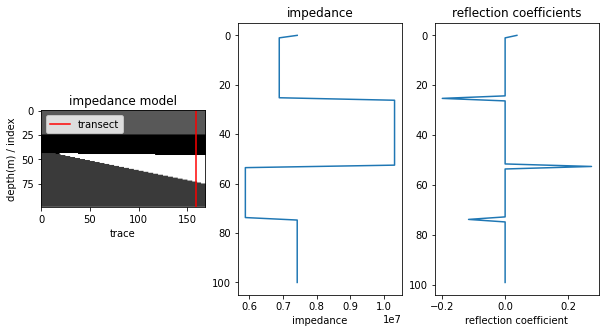

In [102]:
trace_1 = np.shape(impedances_1)[1]-10 #choose whcih trace to visualise

fig, ax = plt.subplots(1,3, figsize=(10, 5))

ax[0].imshow(impedances_1, cmap='gray')
ax[0].axvline(trace_1, c = 'r', label ='transect')
ax[0].set(title = 'impedance model', ylabel='depth(m) / index', xlabel = 'trace')
ax[0].legend()

ax[1].plot(impedances_1[:,trace_1], np.linspace(len(impedances_1), 0, len(impedances_1)))
ax[1].set (title = 'impedance', xlabel = 'impedance')
ax[1].invert_yaxis()

ax[2].plot(reflection_coeff_1[:,trace_1], np.linspace(len(reflection_coeff_1),0,len(reflection_coeff_1)))
ax[2].set (title = 'reflection coefficients', xlabel = 'reflection coefficient')
ax[2].invert_yaxis()
plt.show()

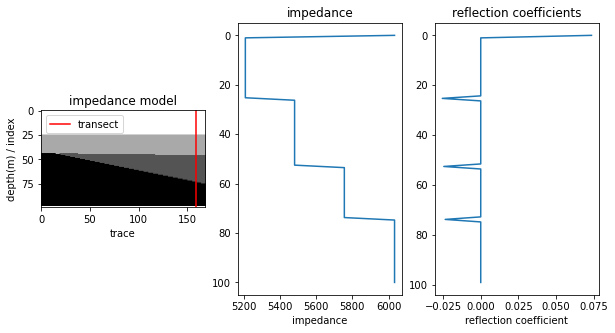

In [103]:
reflection_coeff_2 = (impedances_2[1:,:] - impedances_2[:-1,:]) / (impedances_2[1:,:] + impedances_2[:-1,:]) 
trace_2 = np.shape(impedances_2)[1]-10

fig, ax = plt.subplots(1,3, figsize=(10, 5))
ax[0].imshow(impedances_2, cmap='gray')
ax[0].axvline(trace_2, c = 'r', label ='transect')
ax[0].set(title = 'impedance model', ylabel='depth(m) / index', xlabel = 'trace')
ax[0].legend()

ax[1].plot(impedances_2[:,trace_2], np.linspace(len(impedances_2), 0, len(impedances_2)))
ax[1].set (title = 'impedance', xlabel = 'impedance')
ax[1].invert_yaxis()

ax[2].plot(reflection_coeff_2[:,trace_2], np.linspace(len(reflection_coeff_2),0,len(reflection_coeff_2)))
ax[2].set (title = 'reflection coefficients', xlabel = 'reflection coefficient')
ax[2].invert_yaxis()
plt.show()

## 1.3 Wavelet phase and frequency

When we aquire and process seismic data we would like the source wavelet to be as close as possible to a spike function. In this part of the excercise we will explore the reasons for that.

In this section we will use a wavelet library called Bruges to access different types of wavelet [here](https://bruges.readthedocs.io/api/bruges.filters.wavelets.html)

Important note about our proxy model: Typically the wavelets would be described in terms of amplitude over time, however for simplicity we have kept this as a function of amplitude over index/ (which we are using as a proxy for depth (m)). This does lead to very large wavelets, however allows for a large simplification of our notebook. every behaviour observed in the proxy still resembles real seismic sections.

First, lets plot a Ricker wavelet, minimum-phase wavelet and Ormsby wavelet for a dominant frequency of 20, please note that in our proxy model we are not really looking at frequency (1/t) but instead we are looking at some proxy of 1/wavelength! You will explore other wavelengths later.

### Ricker wavelet

As we discussed in the lectures, Ricker wavelets are not physically possible to produce in nature as part of the wavelet occurs at negative time. They are very useful in seismic interpretation because the highest amplitude part of the wavelet is reflected from horizons. Therefore, as a seismic interpreter you pick the peaks and troughs to establish the depth to horizons (rather than having to interpret parts of the wavelet with zero amplitude which would be the case for a minimum phase wavelet). During the seismic processing workflow a deconvolution step involves designing a filter which converts minimum phase wavelets into Ricker wavelets. As mentioned above, for simplicity we are showing the wavelets in terms of depth rather than time in this exercise.

some further reading: https://academic.oup.com/gji/article/200/1/111/746485

In [5]:
# keep these constant, in our proxy these are actually defining our wavelet total width
# instead of defining wavelet resolution
duration = 0.098
dt = 0.002

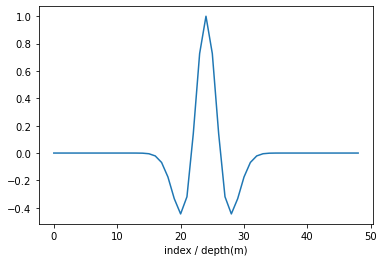

In [6]:
width_inv = 20 # usually we would want this to be frequency, however remember we are just using a proxy

#duration and time in our proxy control the total width of our convolving singnal, keep them constant across exercices!
ricker, t = bruges.filters.ricker(duration=duration, dt=dt, f=width_inv, return_t = True, sym=False) 

#plt.plot(t, ricker) # theoretically we would want to plot this as a function of time, but due to our proxy not being 
#transformed into a time slice and intepolated we will use indexes as a proxy for depth
plt.plot(ricker)
plt.xlabel('index / depth(m)')
plt.show()

we could use padding to convolve a wavelet of a negative time domain into our model, however since this is not possible in reality as mentioned prior we have opted for a simpler proxy. We convolve half the wavelet, this would replicate the shift seen in where we see the geological boundaries maximum amplitude, at the expense however of loosing part of the negative component of the wavelet.

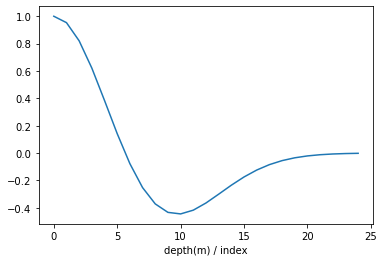

In [191]:
width_inv = 20
ricker_shift, t = bruges.filters.ricker(duration=duration, dt=dt, f=width_inv, return_t = True, sym=False)
ricker_shift = ricker_shift[int(len(ricker_shift)/2):] #this shift/cut is made to resemble the shift we would using typical ricker wavelet with negative time
plt.plot(ricker_shift)
plt.xlabel('depth(m) / index')
plt.show()

### minimum-phase wavelet

**Question: design your own version of a minimum-phase wavelet, make sure you can tweak the wavelength (frequency proxy)**

A minimum phase wavelet requires to start at time zero with zero amplitude.

In [ ]:


.....
minimum_phase =....

plt.plot(minimum_phase)
plt.xlabel('depth(m) / index')
plt.show()

### Ormsby wavelet

**QUESTION: Look into the references documentation ([see here](https://bruges.readthedocs.io/api/bruges.filters.wavelets.html)) and create an ormsby wavelet**

In [ ]:



plt.plot(ormsby)
plt.xlabel('depth(m) / index')
plt.show()

These wavelets we shall label as $W(z)$

## 1.4 Convolution to produce 2D synthetic seismic section

In this section we will take our source wavelet from section 1.3 and convolve it with the reflection coefficients in section 1.2 for Wedge models 1 and 2. Effectively, we are imagining that we have sources and receivers at the same place all the way along the section and are detecting the normal-incidence reflections from directly beneath the source/receiver pairs. 


**QUESTION: If we simply do a convolution of the source wavelet and reflection coefficient profiles along the section what real-world effects are we missing?**

[Answer]

We will first produce a 2D synthetic seismic section for Wedge model 1 using the different wavelets. Please note that there is a large limitation in our proxy model in that the wavelet is convolving as a function of index/depth instead of actual time. Hence the wavelength size we are using currently is very large, however it demonstarte the behaviour well.

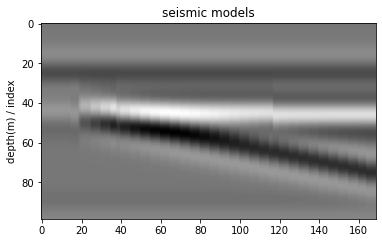

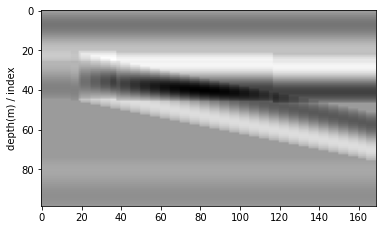

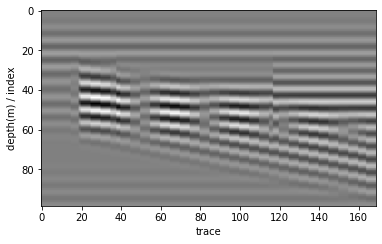

In [142]:
# convolve ricker
synth = np.array([np.apply_along_axis(lambda t: np.convolve(t, ricker, mode='same'), axis=0,
                             arr= reflection_coeff_1)])

plt.imshow(synth[0], cmap='gray', aspect=1)
plt.title('seismic models')
plt.ylabel('depth(m) / index')
plt.show()

# convolve ricker with maximum amplitude at zero
synth = np.array([np.apply_along_axis(lambda t: np.convolve(t, ricker_shift, mode='same'), axis=0,
                             arr= reflection_coeff_1)])

plt.imshow(synth[0], cmap='gray', aspect=1)
plt.title('seismic models')
plt.ylabel('depth(m) / index')
plt.show()
print ("""What you want to appreciate on the two plots above is the shift observed in the boundary position, in reality we cannot start a wavelet at maximum energy with a negative time domain
       however this is usually achieved during processing to see the geological boundaries in the correct position""")

# convolve zero_phase
synth_phase = np.array([np.apply_along_axis(lambda t: np.convolve(t, minimum_phase, mode='same'), axis=0,
                             arr= reflection_coeff_1)])

plt.imshow(synth_phase[0], cmap='gray', aspect=1)
plt.ylabel('depth(m) / index')
plt.show()

#convolve ormsby
synth_ormsby = np.array([np.apply_along_axis(lambda t: np.convolve(t, ormsby, mode='same'), axis=0,
                             arr= reflection_coeff_1)])


plt.imshow(synth_ormsby[0], cmap='gray', aspect=1)
plt.ylabel('depth(m) / index')
plt.xlabel('trace')
plt.show()

print ('note how complicated the models gets with a complex signal, real world source signals are quite complicated but they are simplified during processing')

the data output of this section can be mathematically seen as the convolution of our earth model with our produced wavelet:

$$ D(z) =  W(z) * E(z)$$

An individual trace below shows this convolution visually

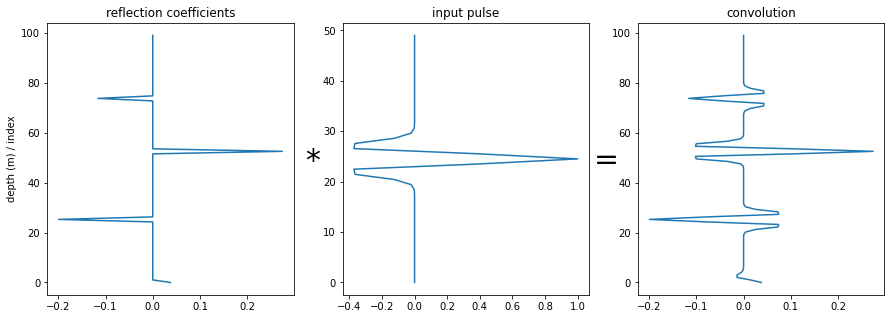

In [42]:
trace_1 = np.shape(impedances_1)[1]-10

fig, ax = plt.subplots(1,3, figsize=(15, 5))
trace = 20 # could implement trace as slider if we think this would be useful
ax[0].plot(reflection_coeff_1[:,trace_1], np.linspace(len(reflection_coeff_1), 0, len(reflection_coeff_1)))
ax[0].set (title = 'reflection coefficients', ylabel='depth (m) / index')
ax[1].plot(ricker,np.linspace(len(ricker), 0, len(ricker)) )
ax[1].set (title = 'input pulse')
ax[2].plot(synth[0,:,trace_1], np.linspace(len(synth[0,:,trace_1]), 0, len(synth[0,:,trace_1])))
ax[2].set (title = 'convolution')
ax[0].text(0.323, 45, '*', size=30)
ax[1].text(1.1, 22.5, '=', size=30)
plt.show()

**QUESTION: Repeat the exercise above this time using Wedge model 2. What are the key differences you note in the seismic reflection sections produced?**

**QUESTION: Now explore how the seismic section differs for Ricker wavelets of different frequency and different types of wavelet (e.g. minimum phase, ormsby). Explain your findings below.**

**Which wavelet best characterises the original geological model?**

# 1.5 attenuation and noise

If you think about this carefully we have essentially done a proxy of the opposite process that we would aim to do in the field. Here we have created our data whereas in the field the data is our input. In reality we would aim to take the inverse of this process to recover the original Earth Model. With our very simplified model above this is not very difficult however in reality, there are many factors that will affect the amplitude and frequency of reflections. Some of these affects can be corrected for during processing (e.g. spherical divergence) and some of them are unknown (e.g. absorption). 

In this section we explore the affect that spherical divergence and absorption will have on seismic reflection images. 

### 1.5.1 Spherical divergence

As seismic waves travel their amplitude decrease by 1/r, so the amplitude of reflections is actually lower than predicted in the example above which only considers amplitude changes related to reflection coefficient. One of the relatively early steps in seismic data processing is to remove this affect by doing the reverse of the calculation below. 

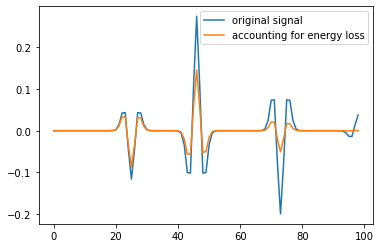

In [43]:
out = np.convolve(reflection_coeff_1[:,trace_1], ricker, mode='same') # take/create seismic trace
decay = np.linspace(1,0,len(out)) #linear decay, can vary this if we like
plt.plot(out, label='original signal')
plt.plot(out*decay, label='accounting for energy loss') # apply predicted/alculatecd decay to the trace
plt.legend()
plt.show()

Note that these examples just act as a proxy to the real world, the underpinning physical relationships could be brought in through the use of tuning parameters. 

In mathematical terms we are now convolving an additional factor that accounts for a loss of energy in our model. Approaching a real model one step more.

### 1.5.2. Absorption, advanced/optional exercice

As seismic waves travel the high-frequency components which have shorter wavelengths are more readily absorbed and scattered. Therefore, as a seismic wave travels it's dominant frequency reduces. This affect is difficult to calculate as it will depend on the properties of the rock. In this example we are using a simple function to simulate frequency decrease with depth. 

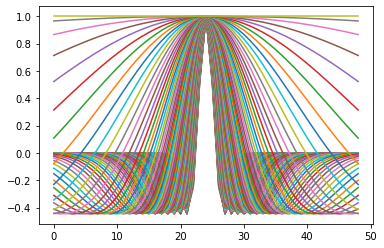

In [44]:
# reducing wavelengths as a function of depth
hz = 70
wave_decay = []
for z in np.linspace(1,0,int(np.shape(reflection_coeff_1)[0])):
    ws, t = bruges.filters.ricker(duration=0.098, dt=0.002, f=hz*z, return_t = True, sym = True);
    wave_decay.append(ws)
    plt.plot(ws)
plt.show()

**EXTENSION QUESTION: Now we want to convolve a wavelet that is a function of depth with our traces. Feel free to attempt this yourself first. One method of achieving this is writing our own convolution function.** 

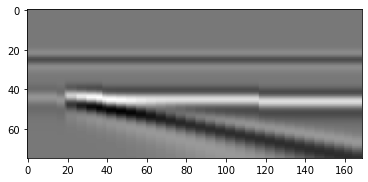

In [49]:



plt.imshow(synthetic.T, cmap = 'gray')
plt.show()

### 1.5.3. Noise

In addition to the factors above incoherent noise ($N(z)$) will inevitably exist in seismic reflection images even after processing. Here we add incoherent noise to add realism to the seismic section. The mathetematical model for this would be: 

$$ D(z) = W(z) * E(z)  + N(z) $$

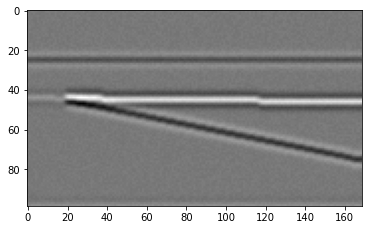

In [50]:
blurred = sp.ndimage.gaussian_filter(synth, sigma=1.1)
noisy = blurred + 0.5 * blurred.std() * np.random.random(blurred.shape)

#show
plt.imshow(noisy[0], cmap='gray', aspect=1)
plt.show()

This is still a very simplistic model, in the real world the function is much more complex when trying to extract the original Earth Model from the Data. For instance the convolution wavelet $W(z)$ consists of a variety of components itself, between many:
- source ghost
- receiver response
- intrument response
- receiver ghost

## 1.6 Challenge- imaging thin channels in an area of wind-turbine installation

You work for a contractor who are going to collect some seismic data in a region of wind-turbine installation. Preliminary assessments have involved drilling a series of boreholes to characterise the subsurface and from this a 2D geological model has been developed (channels.png). This model includes thin, low-velocity channels with a thickness of 5 m buried at a depth of 50 m. 

**Question: Using the relationships learned in the lecture what type of source will use to do this survey if we want to resolve the channels**

some lecture notes worth remembering:
- maximum vertical resolution is 1/4 of the dominant wavelength of the pulse (Rayleigh Criterion), $ \frac{1}{4} \lambda$
- absolute horizontal resolution -> smallest object that can be resolved wihtout migration-> $ width = \sqrt{\frac{ z * \lambda}{2}}    $

[answer]

**Question: Using everything you have learned in this section simulate a seismic section for which we can resolve both the top and base of the channels and identify when they start to disappear**

In [ ]:
# user defined parameters
properties_ = np.array([[2700, 2750],  # p-wave velocity, denisty for layer 1
                  [2400, 2450],
                  [2600, 2650], 
                  [2500, 2550]])
width_inv = 10

# pre-processing
img_ = seis.read_img('data/channel.png')
model_bound_ = label(img_) #identify each section
model_ = seis.remove_bounds(model_bound_)
model_ = sp.ndimage.zoom(model_, 1/(np.shape(model_)[0]/100), order=0)


**Challenge. Try and account for attenuation and noise in the model**

Feel free to draw your own geological models as well and import them

## Questions

We will take 20 minutes at the end of the class to cover any major questions or problems that have come up. You are encouraged to to ask the GTAs and lecturers during the class, however you can always post them on here as well: https://www.menti.com/qia9zs2e5x

## References:

- https://library.seg.org/doi/full/10.1190/tle33060674
- https://mycarta.wordpress.com/2017/10/01/making-many-synthetic-seismic-models-in-python/
- https://bruges.readthedocs.io/api/bruges.filters.wavelets.html